In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('50_Startups.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
finalDataset = pd.concat( [pd.get_dummies(data.State) , data.iloc[:,[0,1,2,4]]] , axis =1 )
finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   California       50 non-null     uint8  
 1   Florida          50 non-null     uint8  
 2   New York         50 non-null     uint8  
 3   R&D Spend        50 non-null     float64
 4   Administration   50 non-null     float64
 5   Marketing Spend  50 non-null     float64
 6   Profit           50 non-null     float64
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [5]:
#Seperate  data as features and label

features = finalDataset.iloc[:,:-1].values
label = finalDataset.iloc[:,[6]].values

# Correlation Analysis

This method  is applicable for Regression  use-case only

In [6]:
finalDataset.corr()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
California,1.000000,-0.492366,-0.515152,-0.143165,-0.015478,-0.168875,-0.145837
Florida,-0.492366,1.000000,-0.492366,0.105711,0.010493,0.205685,0.116244
New York,-0.515152,-0.492366,1.000000,0.039068,0.005145,-0.033670,0.031368
R&D Spend,-0.143165,0.105711,0.039068,1.000000,0.241955,0.724248,0.972900
Administration,-0.015478,0.010493,0.005145,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,-0.168875,0.205685,-0.033670,0.724248,-0.032154,1.000000,0.747766
Profit,-0.145837,0.116244,0.031368,0.972900,0.200717,0.747766,1.000000


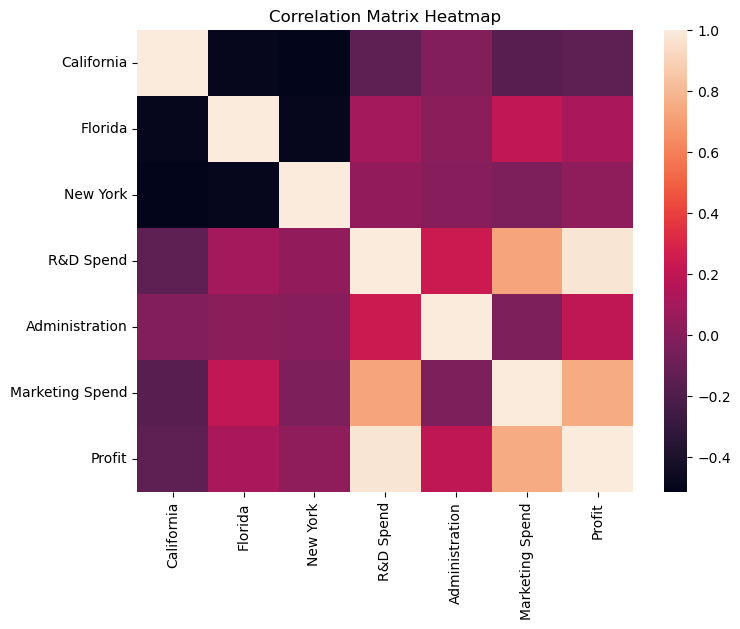

In [7]:
# Calculate the correlation matrix
correlation_matrix = finalDataset.corr()
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [31]:
#
# Select those features who have corr value greater than equal to 0.5
#
# Selected Features are rdSpend and markSpend

In [32]:
# Create a function that accepts features and label and returns selected features
# using corr() based on the guideline provided

def high_correlation_with_target(dataframe, target_column, threshold=0.5):


    correlation = dataframe.corr()[target_column]

    return correlation[correlation.abs() > threshold].drop(target_column)

In [33]:
high_correlation_with_target(finalDataset, 'Profit', threshold=0.5)

R&D Spend          0.972900
Marketing Spend    0.747766
Name: Profit, dtype: float64

In [34]:
high_corr_features = []
label_feature = 'Profit'

# Loop through each column in the DataFrame
for column in finalDataset.columns:
    # Skip the label feature itself
    if column == label_feature:
        continue

    # Calculate the correlation between the label feature and the current column
    correlation = finalDataset[label_feature].corr(finalDataset[column])

    # Check if the correlation is greater than 0.5
    if abs(correlation) > 0.5:
        high_corr_features.append(column)

# Print the list of features with correlation > 0.5
print("Features with correlation > 0.5:", high_corr_features)

Features with correlation > 0.5: ['R&D Spend', 'Marketing Spend']


# **RFE (Recursive Feature Elimination)**

In [35]:
# RFE can be applied only on
#
# Regression: (coeff_)
#  1. LinearRegression
#  2. SupportVectorRegression
#  3. DecisionTreeRegression
#  4. RandomForestRegression
#
# Classification (feature__importance__)
#  1. DecisionTreeClassifier
#  2. RandomForestClassifier

In [36]:
# Steps for RFE
# 1. Initialize ML algorithm
# 2. Apply RFE to the model
# 3. Get the features with High Ranking


In [37]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()

from sklearn.feature_selection import RFE
selectFeatures = RFE(estimator=modelLR, step=1) #Step means informing RFE how much features to eliminate per iteration.
selectFeatures.fit(features,label)

RFE(estimator=LinearRegression())

In [38]:
#Guideline for selection is to consider those features with rank1 and rank2
selectFeatures.ranking_

array([1, 1, 1, 2, 3, 4])

In [40]:
#Variation 2 -- Here the dev can inform RFE to select the top n features for my modelling

from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()

from sklearn.feature_selection import RFE
selectFeaturesUsingSupport = RFE(estimator=modelLR, n_features_to_select=3)
selectFeaturesUsingSupport.fit(features,label)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [41]:
selectFeaturesUsingSupport.support_

array([ True,  True,  True, False, False, False])

# **Selecting Features Based on Variance**

The higher the variance of a feature column, the more likely to be statistically informative or relevant to the model

Lower the variance, eliminate the features. The variance threshold can be anything within the range of 0.5 to 0.9

Suggestion by Prashant Nair: Threshold = CL - 25% of CL


In [42]:
from sklearn.feature_selection import VarianceThreshold
selectFeatures = VarianceThreshold(threshold=0.5)
selectFeatures.fit(finalDataset.drop('Profit',axis=1))

VarianceThreshold(threshold=0.5)

In [43]:
finalDataset.columns[selectFeatures.get_support(indices=True)]

Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')

In [44]:
from sklearn.feature_selection import VarianceThreshold
CL = 0.95
selectFeaturesCL = VarianceThreshold(threshold= CL - (0.25*CL))
selectFeaturesCL.fit(finalDataset.drop('Profit',axis=1))
finalDataset.columns[selectFeaturesCL.get_support(indices=True)]

Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')

## **# SelectFromModel**

In [37]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()

from sklearn.feature_selection import SelectFromModel
selectFeaturesUsingSupport = SelectFromModel(modelLR)
selectFeaturesUsingSupport.fit(features,label)

SelectFromModel(estimator=LinearRegression())

In [38]:
selectFeaturesUsingSupport.get_support()

array([ True,  True,  True, False, False, False])